# Single variable linear regression

In [1]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import pandas as pd

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
## Reading in training data
data = pd.read_csv('ex1data1.txt', header=None)
print(data.head())
print(data.describe())

NameError: name 'pd' is not defined

## Plotting training data

In [3]:
plt.figure(1)
plt.scatter(data[0], data[1])
plt.xticks(np.arange(5, 30, step=5))
plt.yticks(np.arange(-5, 30, step=5))
plt.xlabel('Population of City (10,000s)')
plt.ylabel('Profit ($10,000)')
plt.title('Profit Vs Population')
plt.show()

NameError: name 'plt' is not defined

## Setting up input variables

In [4]:
data_n = data.values
print(data_n)

NameError: name 'data' is not defined

In [5]:
# Getting number of training examples (m)
m = data_n.shape[0]
print(m)

NameError: name 'data_n' is not defined

In [6]:
x = np.append(np.ones((m, 1)), data_n[:, 0].reshape(m, 1), axis=1)
print(x)

NameError: name 'm' is not defined

In [7]:
y = data_n[:, 1].reshape(m, 1)
print(y)

NameError: name 'data_n' is not defined

In [8]:
theta = np.zeros((2, 1))
print(theta)

[[0.]
 [0.]]


## Cost function and gradient descent

In [9]:
def computeCost ( x, y, theta, m ):
    predicted_y = x.dot(theta)
    squared_error = (predicted_y - y) ** 2
    mean_squared_error = (1 / (2 * m)) * np.sum(squared_error)
    return mean_squared_error

In [10]:
initial_cost = computeCost(x, y, theta, m)
print("initial_cost is: {}".format(initial_cost))

NameError: name 'x' is not defined

In [11]:
def gradientDescent ( x, y, theta, m, alpha, num_iters ):
    print("\nPerforming gradient descent...")
    J_cost_history = []
    for i in range(num_iters):
        predictions = x.dot(theta)
        temp = np.dot(x.transpose(), (predictions - y))
        theta = theta - (alpha / m) * temp
        J_cost_history.append(computeCost(x, y, theta, m))
    return theta, J_cost_history


In [12]:
alpha = 0.01
num_iterations = 1500
final_theta, J_cost_history = gradientDescent(x, y, theta, m, alpha, num_iterations)
print("\nfinal_theta is:\n", final_theta)
print("Linear equation would be: {} theta_0 + {} theta_1 ".format(
    final_theta[0][0],
    final_theta[1][0],
))

NameError: name 'x' is not defined

## Cost function plot

In [13]:
plt.figure(2)
plt.plot(J_cost_history)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.show()

NameError: name 'plt' is not defined

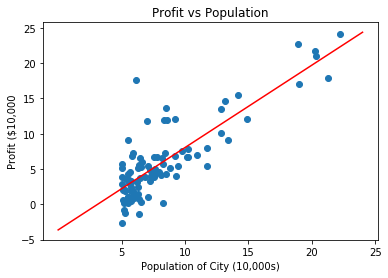

In [14]:
plt.scatter(data[0],data[1])
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit vs Population")

x_value=[x for x in range(25)]
y_value=[final_theta[0] + y*final_theta[1] for y in x_value]
plt.plot(x_value,y_value,color="r")

plt.show()

## Examples of predictions

In [15]:
def predict (x, theta):
    theta_transpose = theta.transpose()
    #print (theta_transpose)
    #print (x)
    prediction = theta_transpose.dot(x)
    return prediction
    

print ("final theta is:\n{}".format(final_theta))
x = np.zeros((2,1))
x[0][0] = 1
x[1][0] = 3.5
print ("\nx is:\n{}".format(x))

    

final theta is:
[[-3.63029144]
 [ 1.16636235]]

x is:
[[1. ]
 [3.5]]


In [16]:
prediction = predict(x, final_theta)
print("For population = 35,000, we predict a profit of $"+str(prediction[0][0]* 10000))

For population = 35,000, we predict a profit of $4519.7678677017675


In [17]:
prediction2=predict(np.array([1,7]),final_theta)
print("For population = 70,000, we predict a profit of $"+ str(prediction2[0]*10000))

For population = 70,000, we predict a profit of $45342.45012944714


## Multi variable linear regression

In [18]:
## Reading in training data
data2 = pd.read_csv('ex1data2.txt', header=None)
print(data2.head())

print(data2.describe())

      0  1       2
0  2104  3  399900
1  1600  3  329900
2  2400  3  369000
3  1416  2  232000
4  3000  4  539900
                 0          1              2
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000


## Create 2 subplot, 1 for each variable

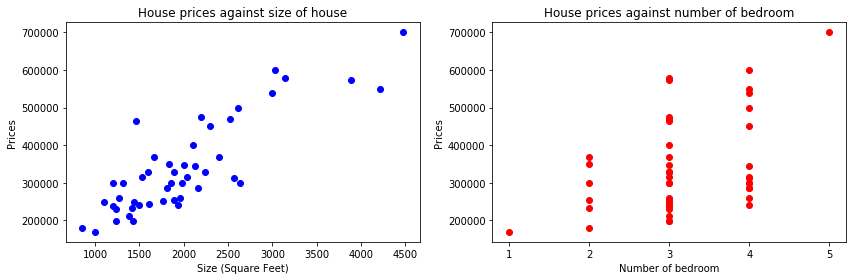

In [19]:
fig, axes = plt.subplots(figsize=(12,4),nrows=1,ncols=2)
axes[0].scatter(data2[0],data2[2],color="b")
axes[0].set_xlabel("Size (Square Feet)")
axes[0].set_ylabel("Prices")
axes[0].set_title("House prices against size of house")

axes[1].scatter(data2[1], data2[2], color='r')
axes[1].set_xlabel("Number of bedroom")
axes[1].set_ylabel("Prices")
axes[1].set_xticks(np.arange(1,6,step=1))
axes[1].set_title("House prices against number of bedroom")

plt.tight_layout()

## Feature Normalization

In [20]:
data_n2=data2.values
m2=len(data_n2[:,-1])
X2=data_n2[:,0:2].reshape(m2,2)
print ("X2 is:\n{}".format(X2))


X2 is:
[[2104    3]
 [1600    3]
 [2400    3]
 [1416    2]
 [3000    4]
 [1985    4]
 [1534    3]
 [1427    3]
 [1380    3]
 [1494    3]
 [1940    4]
 [2000    3]
 [1890    3]
 [4478    5]
 [1268    3]
 [2300    4]
 [1320    2]
 [1236    3]
 [2609    4]
 [3031    4]
 [1767    3]
 [1888    2]
 [1604    3]
 [1962    4]
 [3890    3]
 [1100    3]
 [1458    3]
 [2526    3]
 [2200    3]
 [2637    3]
 [1839    2]
 [1000    1]
 [2040    4]
 [3137    3]
 [1811    4]
 [1437    3]
 [1239    3]
 [2132    4]
 [4215    4]
 [2162    4]
 [1664    2]
 [2238    3]
 [2567    4]
 [1200    3]
 [ 852    2]
 [1852    4]
 [1203    3]]


In [21]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    print("mean is:\n{}".format(mean))
    std=np.std(X,axis=0)
    print("std is:\n{}".format(std))
    X_norm = (X - mean)/std
    return X_norm , mean , std

X2, mean_X2, std_X2 = featureNormalization(X2)


mean is:
[2000.68085106    3.17021277]
std is:
[7.86202619e+02 7.52842809e-01]


In [22]:
X2 = np.append(np.ones((m2,1)),X2,axis=1)
print("X2 is:\n{}\n".format(X2[0:4]))

y2=data_n2[:,-1].reshape(m2,1)
print("y2 is:\n{}\n".format(y2[0:4]))

theta2=np.zeros((3,1))
print("theta2 is:\n{}\n".format(theta2))

X2 is:
[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]]

y2 is:
[[399900]
 [329900]
 [369000]
 [232000]]

theta2 is:
[[0.]
 [0.]
 [0.]]



In [23]:
print(computeCost(X2, y2, theta2, m2))


65591548106.45744


In [24]:
theta2, J_history2 = gradientDescent(X2,y2,theta2,m2, 0.01,400)
print(theta2)


Performing gradient descent...
[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


In [25]:
print("h(x) ="+str(round(theta2[0,0],2))+" + "+str(round(theta2[1,0],2))+"x1 + "+str(round(theta2[2,0],2))+"x2")

h(x) =334302.06 + 99411.45x1 + 3267.01x2


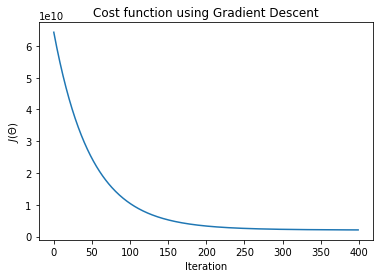

In [26]:
plt.plot(J_history2)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.show()

## Example

In [27]:
#feature normalisation of x values
x_sample = featureNormalization(np.array([1650,3]))[0]
print("x_sample is:\n{}".format(x_sample))
x_sample=np.append(np.ones(1),x_sample)
predict3=predict(x_sample,theta2)
print("For size of house = 1650, Number of bedroom = 3, we predict a house value of ${}".format(predict3[0]))

mean is:
826.5
std is:
823.5
x_sample is:
[ 1. -1.]
For size of house = 1650, Number of bedroom = 3, we predict a house value of $430446.5006128006
